## Homework 4: Linear models

In this homework you will get more practice in combining data from different sources and in fitting a linear regression model in order to understand the relationship betweem various properties of words and the speed with which people can recognize them.

We will be using the files `ldt_trials.csv` and `word_properties.csv` in the `data` folder. These files contain lexical decision reaction times for each participant and each word (`ldt_trials.csv`) and information about various word properties such as word length, word frequency, concreteness and emotional valence (`word_properties.csv`). These data were obtained from the English Lexicon Project: https://elexicon.wustl.edu/index.html

Your main goal for this homework is to understand how reaction times to recognize a word vary as a function of each of these word properties.

#### Part 1: Loading and organizing the data

Since the reaction times and the word properties are stored in different files, you will have to load them separately, then combine them before analyzing the data. The `ldt_trials.csv` file is in tidy format and each row contains RTs in response to a particular word for a particular participants. The `word_properties.csv` file contains one row per word listing its various properties in columns.

First, load the two datasets. Use the `str`, `heads` and `summary` commands for each dataset in order to understand how they are structured:

In [61]:
library(tidyverse)
setwd("C:/Users/hanna/Desktop/FS21/data_science/HW4/DataSciencePsychUZH/Homeworks/data")
data_trials <- read.csv("ldt_trials.csv", header = TRUE)
data_word <- read.csv("word_properties.csv", header = TRUE)

str(data_trials)
head(data_trials)
summary(data_trials)

str(data_word)
head(data_word)
summary(data_word)

'data.frame':	333970 obs. of  8 variables:
 $ Sub_ID    : int  85 85 85 85 85 85 85 85 85 85 ...
 $ Trial     : int  83 84 85 86 87 88 89 90 91 92 ...
 $ Type      : int  0 1 1 1 1 1 1 0 0 0 ...
 $ D_Accuracy: int  1 1 1 1 1 0 1 1 1 0 ...
 $ D_RT      : int  796 1056 541 1215 587 1072 677 1109 2014 1361 ...
 $ D_word    : chr  "pisect" "hindquarters" "healthy" "loony" ...
 $ Outlier   : int  0 0 0 0 0 0 0 0 1 0 ...
 $ D_Zscore  : num  0.0531 0.9732 -0.8494 1.5359 -0.6866 ...


,Sub_ID,Trial,Type,D_Accuracy,D_RT,D_word,Outlier,D_Zscore
,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
1,85,83,0,1,796,pisect,0,0.053086
2,85,84,1,1,1056,hindquarters,0,0.973239
3,85,85,1,1,541,healthy,0,-0.849372
4,85,86,1,1,1215,loony,0,1.535949
5,85,87,1,1,587,seahorse,0,-0.686576
6,85,88,1,0,1072,abysmal,0,1.029864


     Sub_ID           Trial           Type       D_Accuracy      
 Min.   :  1.00   Min.   :   1   Min.   :0.0   Min.   :  0.0000  
 1st Qu.: 26.00   1st Qu.: 844   1st Qu.:0.0   1st Qu.:  1.0000  
 Median : 51.00   Median :1687   Median :0.5   Median :  1.0000  
 Mean   : 50.91   Mean   :1687   Mean   :0.5   Mean   :  0.8688  
 3rd Qu.: 76.00   3rd Qu.:2531   3rd Qu.:1.0   3rd Qu.:  1.0000  
 Max.   :100.00   Max.   :3374   Max.   :1.0   Max.   :120.0000  
      D_RT           D_word             Outlier           D_Zscore      
 Min.   :   1.0   Length:333970      Min.   :0.00000   Min.   :-4.0400  
 1st Qu.: 619.0   Class :character   1st Qu.:0.00000   1st Qu.:-0.5500  
 Median : 771.0   Mode  :character   Median :0.00000   Median :-0.0793  
 Mean   : 907.5                      Mean   :0.03758   Mean   : 0.2139  
 3rd Qu.:1045.0                      3rd Qu.:0.00000   3rd Qu.: 0.6632  
 Max.   :4000.0                      Max.   :1.00000   Max.   :19.1251  

'data.frame':	8710 obs. of  5 variables:
 $ Word               : chr  "abandon" "abdomen" "abdominal" "abduction" ...
 $ Length             : int  7 7 9 9 5 7 4 8 5 8 ...
 $ SUBTLWF            : num  8.1 3.35 3.41 3.63 2.71 ...
 $ Concreteness_Rating: num  2.54 4.7 4.28 3.07 1.68 1.81 2.38 2.14 2.83 3.41 ...
 $ Emotional_Valence  : num  2.84 5.43 4.48 2.05 5.52 7 6.64 3.53 3.1 2.58 ...


,Word,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,abandon,7,8.10,2.54,2.84
2,abdomen,7,3.35,4.70,5.43
3,abdominal,9,3.41,4.28,4.48
4,abduction,9,3.63,3.07,2.05
5,abide,5,2.71,1.68,5.52
6,ability,7,19.22,1.81,7.00


     Word               Length          SUBTLWF        Concreteness_Rating
 Length:8710        Min.   : 2.000   Min.   :   1.00   Min.   :1.120      
 Class :character   1st Qu.: 5.000   1st Qu.:   1.76   1st Qu.:2.410      
 Mode  :character   Median : 7.000   Median :   3.86   Median :3.400      
                    Mean   : 6.854   Mean   :  32.05   Mean   :3.384      
                    3rd Qu.: 8.000   3rd Qu.:  12.10   3rd Qu.:4.380      
                    Max.   :14.000   Max.   :6161.41   Max.   :5.000      
 Emotional_Valence
 Min.   :1.300    
 1st Qu.:4.370    
 Median :5.320    
 Mean   :5.165    
 3rd Qu.:6.100    
 Max.   :8.530    

We now want to merge the two datasets such that we have the properties of each word listed in every row of the `ldt_trial.csv`. Use the `left_join()` command from the `tidyverse` package to join the two datasets. You have to specify which column you are mergin by. In this case, the columns `Word` in the `word_properties` dataset and the column `D_word` in the `ldt_trials` dataset should be used for the merging (hint: read the documentation of the `left_join()` function to understand how the `by=c()` argument works). Join the two datasets by the respective columns and save the output in a new variable:

In [67]:
?left_join
data_joined <- left_join(data_trials, data_word, by=c("D_word" = "Word"))



You will notice that we do not have word characteristics for every word that the participants were tested (e.g., there are many NA values in the Length, Concreteness, etc, columns of the new merged dataset. Filter the new dataset and save it to a new variable so that the new dataset only has rows for which word characteristics are present (hint: you can use the `!is.na(column_name)` argument in the filter command to remove all rows in which `column_name` has NA values:

In [68]:
data_filter <- filter(data_joined, !is.na(Length), !is.na(SUBTLWF), !is.na(Concreteness_Rating), !is.na(Emotional_Valence))


After these operations the final dataset should have 35978 rows. Use the `nrow()` command to confirm this. Use the `heads()` command to take a look at the dataset:

In [69]:
nrow(data_filter)
head(data_filter)

[1] 35978

,Sub_ID,Trial,Type,D_Accuracy,D_RT,D_word,Outlier,D_Zscore,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,85,85,1,1,541,healthy,0,-0.849372,7,24.75,3.31,7.76
2,85,86,1,1,1215,loony,0,1.535949,5,2.41,2.15,4.48
3,85,89,1,1,677,cart,0,-0.368061,4,9.04,4.89,5.37
4,85,100,1,1,659,blunt,0,-0.431764,5,4.90,3.07,4.65
5,85,101,1,1,532,thousand,0,-0.881224,8,69.29,3.08,6.44
6,85,111,1,1,597,lyrics,0,-0.651186,6,5.08,3.86,6.42


The column `Sub_ID` contains the ID number for the different participants. How many participants are there in this experiment? (hint: you can combine the `unique()` and `length()` commands to answer this question):

In [70]:
data_unique <- unique(data_filter$Sub_ID)
length(data_unique)

[1] 99

On average, how many observations are there for each participant? Calculate the mean and standard deviation of the number of observations per participant using the `group_by()` and `summarize()` commands:

In [92]:
data_group <- data_filter %>% group_by(Sub_ID) %>% summarize(n_observations=n())
data_group %>% summarize(mean=mean(n_observations), sd=sd(n_observations))

mean,sd
<dbl>,<dbl>
363.4141,16.90611


#### Part 2: Visualize and understand the data

For each of the word properties (Length, SUBTLWF, Concreteness_Rating, Emotional_Valence), plot a scatterplot how the lexical decision reaction times (`D_RT`) changes. Fit a smooth line through the plot with the `geom_smooth()` command in the `ggplot` (hint: use the `stat_summary()` command of the ggplot call to summarise the y axis for each x axis point. hint2: for SUBTLWF, which is word frequency, first round the variable to remove the decimal point values -  e.g., `ggplot(newdf, aes(round(SUBTLWF), D_RT))`); for concretness and emotional valence, try plotting before and after rounding the x axis. For SUBTWLF, plot the data after transforming it to a logarithm.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

No summary function supplied, defaulting to `mean_se()`

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

No summary function supplied, defaulting to `mean_se()`



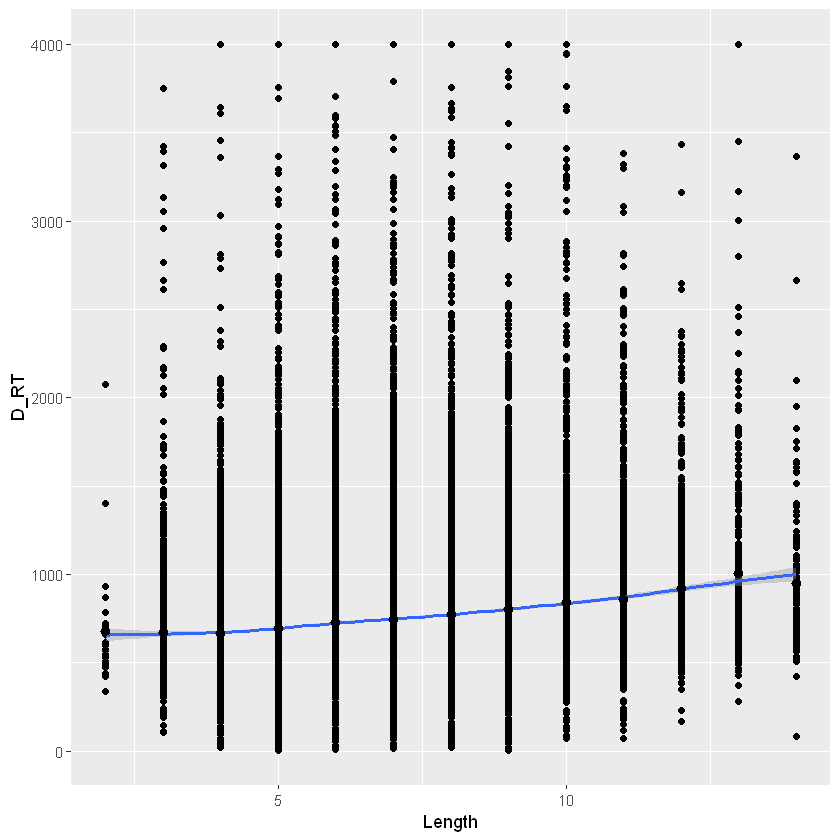

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

No summary function supplied, defaulting to `mean_se()`



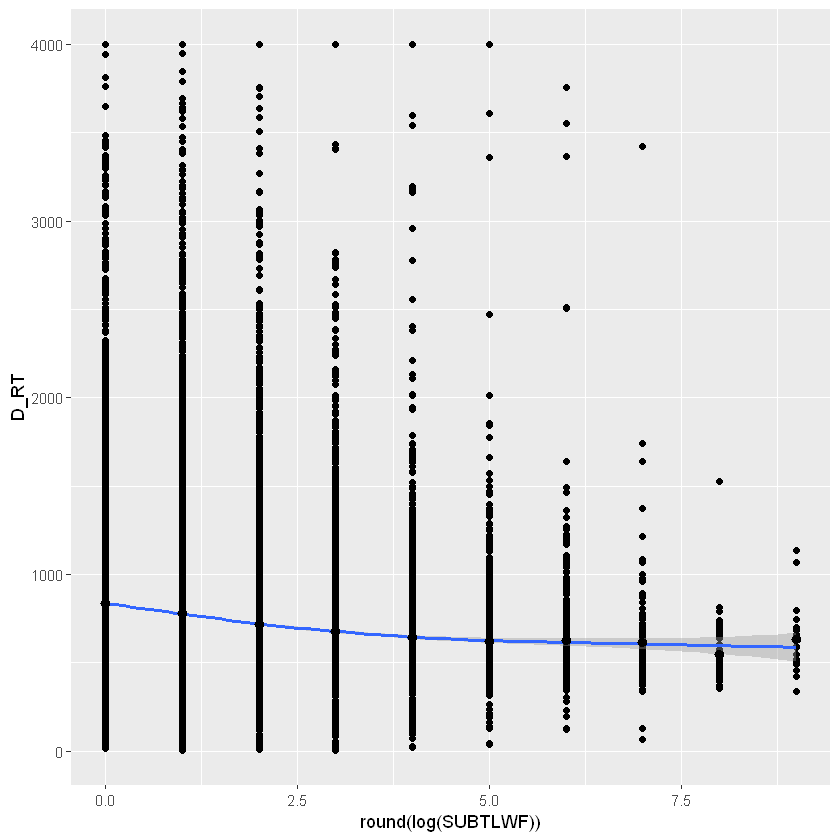

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k."
No summary function supplied, defaulting to `mean_se()`



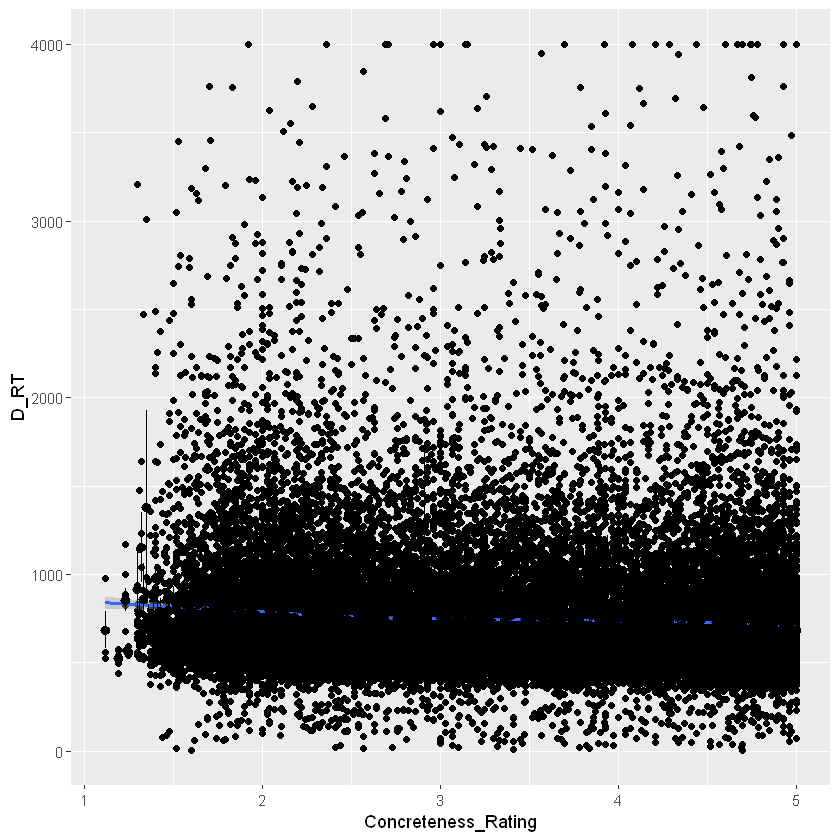

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

No summary function supplied, defaulting to `mean_se()`



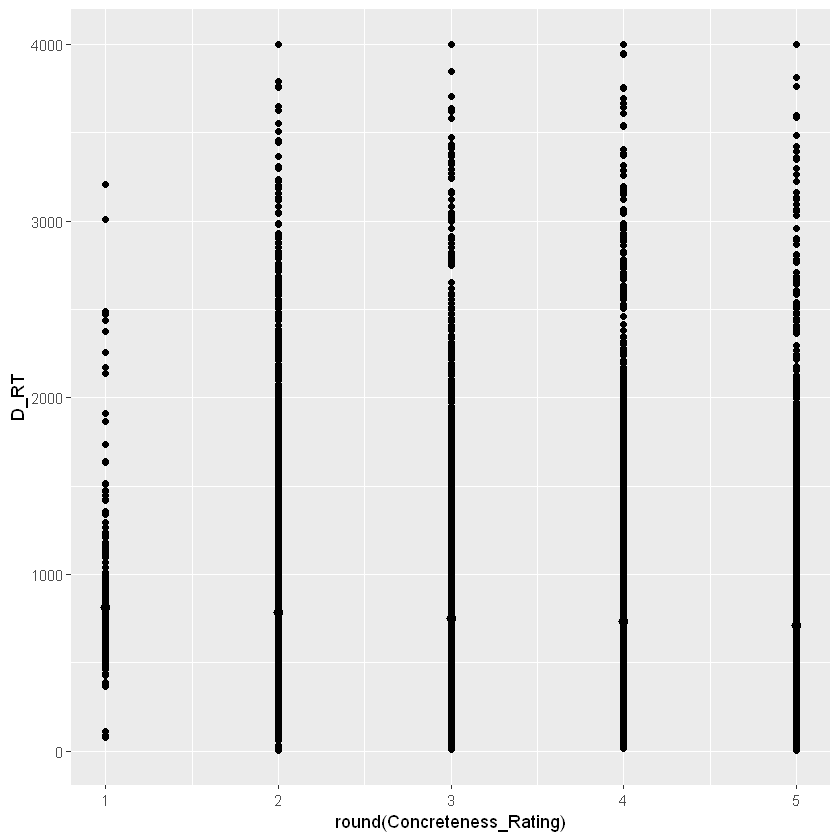

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k."
No summary function supplied, defaulting to `mean_se()`



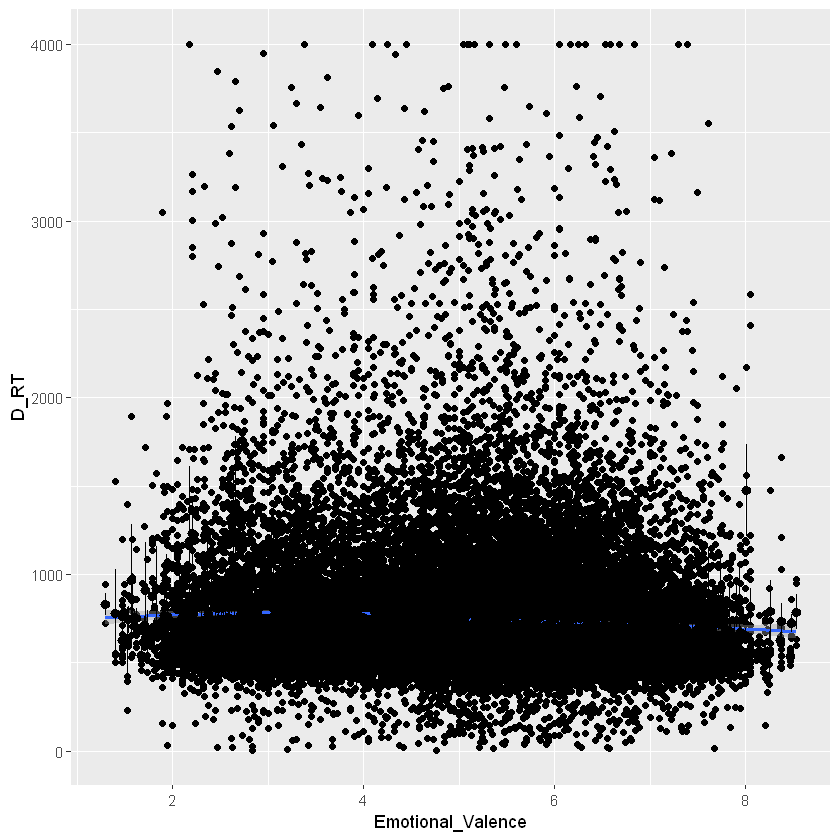

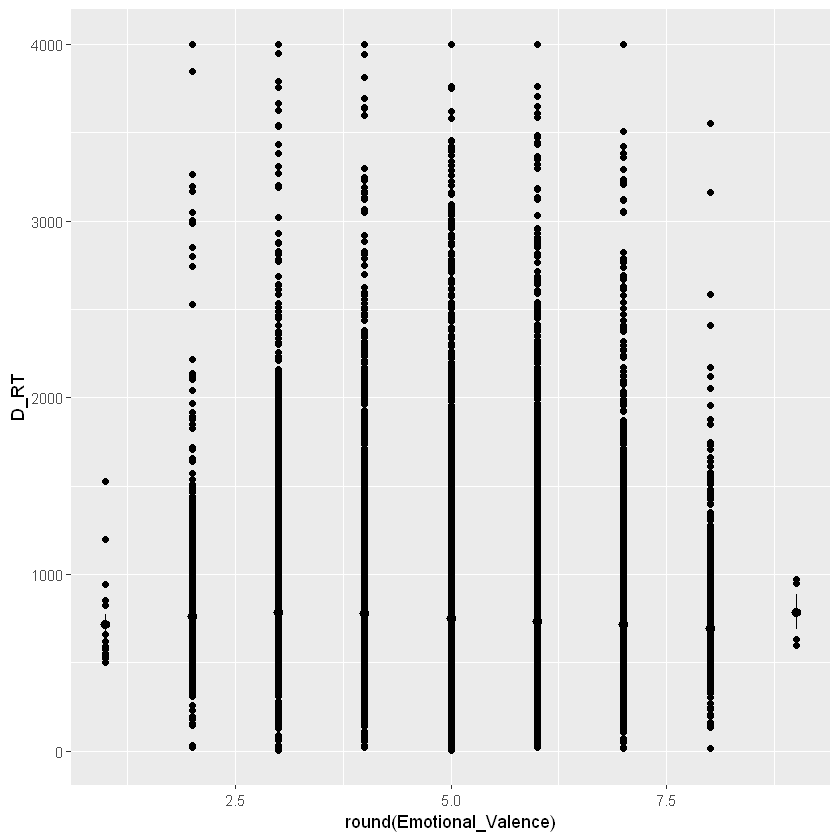

In [26]:
library(ggplot2)
ggplot(data_filter, aes(Length, D_RT)) + geom_point() + geom_smooth() + stat_summary()
ggplot(data_filter, aes(round (log (SUBTLWF)), D_RT)) + geom_point() + geom_smooth() + stat_summary()
ggplot(data_filter, aes(Concreteness_Rating, D_RT)) + geom_point() + geom_smooth() + stat_summary()
ggplot(data_filter, aes(round (Concreteness_Rating), D_RT)) + geom_point() + geom_smooth() + stat_summary()
ggplot(data_filter, aes(Emotional_Valence, D_RT)) + geom_point() + geom_smooth() + stat_summary()
ggplot(data_filter, aes(round (Emotional_Valence), D_RT)) + geom_point() + geom_smooth() + stat_summary()

Based on the previous plots, for which of these predictions would a linear regression be a good model of reaction times? Why/why not?

> A linear regression seems to be a good model for the variables Length, Concreteness_Rating and Emotional_Valence because the blue lines, which indicate the relationship between the predictors (Length, Concreteness_Rating, Emotional_Valence) and D_RT, are nearly straight lines, therefore the relationships seem to be linear. Since the linear regression fits a straight line through the model, it seems to fit well.
SUBTWLF: It is important to transform the data into a logarithm because otherwise the blue line has the shape of a logarithmic function, which indicates that a logarithmic function underlies the data. However, when you applied a logarithm the blue line is still not straight, but slighlty curved at the beginning. It's not as straight as the blue lines of the other predictors. But since the curve is only slightly visible, I would still use a linear regression because the linear regression is easier to interpret than other models, even though the linear regression is not the perfect model for this relationship. 




To what degree are the 4 predictors correlated with each other?

In [72]:
data_cor <- cbind(data_filter$Length, data_filter$SUBTLWF, data_filter$Concreteness_Rating, data_filter$Emotional_Valence)
cor(data_cor)

1.00000000,-0.14505419,-0.31793980,-0.01753049
-0.14505419,1.00000000,-0.03162817,0.07856745
-0.31793980,-0.03162817,1.00000000,0.07556639
-0.01753049,0.07856745,0.07556639,1.00000000


#### Part 3: Fit a linear model

Use the `lm` command to fit a linear regression to the `D_RT` variable using the four predictors. Assign the output to a new variable called `ml1`. Use the `summary(ml1)` command to display the output of the model:


In [8]:
ml1 <- lm(D_RT ~ Length + SUBTLWF + Concreteness_Rating + Emotional_Valence, data=data_filter)
summary(ml1)


Call:
lm(formula = D_RT ~ Length + SUBTLWF + Concreteness_Rating + 
    Emotional_Valence, data = data_filter)

Residuals:
   Min     1Q Median     3Q    Max 
-853.4 -195.5  -93.9   74.2 3330.1 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         667.074558  12.426760  53.680  < 2e-16 ***
Length               26.415737   0.892603  29.594  < 2e-16 ***
SUBTLWF              -0.040145   0.009348  -4.295 1.75e-05 ***
Concreteness_Rating  -6.209688   1.902962  -3.263   0.0011 ** 
Emotional_Valence   -15.062538   1.436979 -10.482  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 359.7 on 35973 degrees of freedom
Multiple R-squared:  0.03429,	Adjusted R-squared:  0.03418 
F-statistic: 319.3 on 4 and 35973 DF,  p-value: < 2.2e-16


What is the intercept value and the slope for the word length predictor? Explain what these values means:
> The intercept for the word length predictor is 667.07 and the slope is 26.42. The intercept value means is the reaction time, when lenth is zero. The slope means how much the reaction time changes, when the length gains one unit. 

What is the R-squared value? What does this mean?
> The multiple R-squared value is 0.03429 (R-squared adjusted: 0.03418). The R-squared shows how much variance of the D_RT variable the model can explain.

As you noticed, the R-squared value is really low. This is because there is a lot of individual differences in how fast people react. These differences cannot be explained by word characteristics. One way to account for individual differences is to summarize the data over participants, and obtain the average RTs for each word. Let's do this and refit the model.

First, use the `group_by` and `summarise` commands to calculate the average RT for each word. In order to keep the word characteristics, include those columns in the `group_by` call. E.g.: `group_by(D_word, Length, SUBTLWF, Concreteness_Rating, Emotional_Valence)`. Save the result to a new variable. Use the `heads` command to look at the data:

In [85]:
data_new <- data_filter %>% group_by (D_word, Length, SUBTLWF, Concreteness_Rating, Emotional_Valence) %>% summarise (RT_mean = mean(D_RT))
data_new


`summarise()` has grouped output by 'D_word', 'Length', 'SUBTLWF', 'Concreteness_Rating'. You can override using the `.groups` argument.



D_word,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence,RT_mean
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
abandon,7,8.10,2.54,2.84,1175.5000
abdomen,7,3.35,4.70,5.43,778.6667
abdominal,9,3.41,4.28,4.48,833.4000
abduction,9,3.63,3.07,2.05,708.0000
abide,5,2.71,1.68,5.52,602.2500
ability,7,19.22,1.81,7.00,654.2500
able,4,159.90,2.38,6.64,583.2000
abnormal,8,2.90,2.14,3.53,669.4000
abort,5,4.61,2.83,3.10,828.7500


Now, fit the linear model again using the summarised data. Do the estimates of intercept and slope differ much from the previous model? How about the R-squared value? If so, why do you think that is the case?

In [86]:
ml2 <- lm(RT_mean~Length+SUBTLWF+Concreteness_Rating+Emotional_Valence, data=data_new)
summary(ml2)



Call:
lm(formula = RT_mean ~ Length + SUBTLWF + Concreteness_Rating + 
    Emotional_Valence, data = data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-459.92 -128.20  -42.25   78.34 1653.93 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         667.42698   13.40956  49.772  < 2e-16 ***
Length               26.51743    0.96339  27.525  < 2e-16 ***
SUBTLWF              -0.03931    0.01004  -3.915  9.1e-05 ***
Concreteness_Rating  -6.32646    2.05367  -3.081  0.00207 ** 
Emotional_Valence   -15.06291    1.55261  -9.702  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 191.1 on 8705 degrees of freedom
Multiple R-squared:  0.1124,	Adjusted R-squared:  0.112 
F-statistic: 275.5 on 4 and 8705 DF,  p-value: < 2.2e-16


> Intercept and slope don't differ much from the previous model. That totally makes sense because the variables Length, SUBTLWF, Concreteness_Rating and Emotional_Valence, which we use as predictors for the model, are the same for different observations of the same word and do not differ between the two different models. Between ml1 and ml2 we don't change the values of the predictors.
The R-squared improved a bit from 0.03 to 0.11, which implies that this model explains more variance that the previous one. My explanation is that the training data consists of the mean reaction time per word instead of all the reaction times per word in different trials,so the training data has a smaller variance because there are less values.


Finally, change the predictor for the SUBTLWF to be the log(SUBTLWF) value. Does the R-squared increase? Why/why not?

In [87]:
ml3 <- lm(RT_mean~Length+log(SUBTLWF)+Concreteness_Rating+Emotional_Valence, data=data_new)
summary(ml3)



Call:
lm(formula = RT_mean ~ Length + log(SUBTLWF) + Concreteness_Rating + 
    Emotional_Valence, data = data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-424.41 -124.05  -38.05   75.66 1713.44 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         742.0081    13.5267  54.855  < 2e-16 ***
Length               19.9617     0.9846  20.274  < 2e-16 ***
log(SUBTLWF)        -32.5164     1.5086 -21.554  < 2e-16 ***
Concreteness_Rating  -8.0244     1.9977  -4.017 5.95e-05 ***
Emotional_Valence    -9.1901     1.5376  -5.977 2.36e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 186.4 on 8705 degrees of freedom
Multiple R-squared:  0.1559,	Adjusted R-squared:  0.1555 
F-statistic: 401.8 on 4 and 8705 DF,  p-value: < 2.2e-16


> The R-squared improved from 0.11 to 0.16, so this model explains more variance than the previous. This makes totally sense since we saw before that the underlying function of SUBTLWF is logarithmic and not linear. When we include the logarithmic function the model gets better and therefore explains more variance.